In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt

## 1. Data Exploration

### Load Dataset

In [5]:
titanic= pd.read_csv("C:\\Users\\hp\\Desktop\\Titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.shape

(891, 12)

In [9]:
# dropping the unnecessary columns as it is not required
titanic.drop(["PassengerId","Name","Ticket","Cabin"],inplace=True,axis = 1)

In [11]:
#Shape of the data set
titanic.shape

(891, 8)

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Handle missing values

In [15]:
titanic[titanic.isnull().any(axis=1)].shape

(179, 8)

In [17]:
#imputation of null values
titanic["Age"]=titanic.Age.fillna(titanic.Age.median())
titanic["Embarked"]=titanic.Embarked.fillna(titanic.Embarked.mode()[0])

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [21]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Detect and trest outliers

<Axes: >

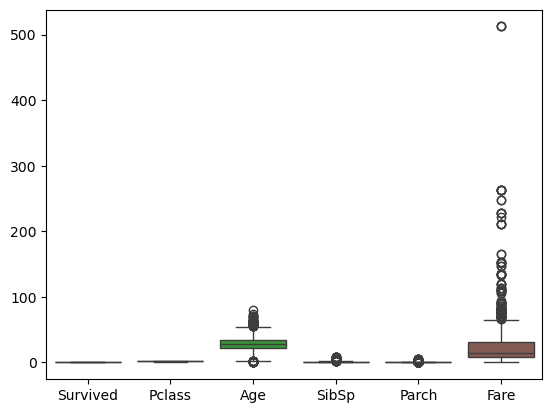

In [23]:
sn.boxplot(data=titanic)

In [23]:
# Calculate Q1, Q3, and IQR
Q1 = titanic['Age'].quantile(0.25)
Q3 = titanic['Age'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
titanic['Age'] = titanic['Age'].clip(lower=lower_bound, upper=upper_bound)

In [25]:
# Calculate Q1, Q3, and IQR
Q1 = titanic['SibSp'].quantile(0.25)
Q3 = titanic['SibSp'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
titanic['SibSp'] = titanic['SibSp'].clip(lower=lower_bound, upper=upper_bound)

In [27]:
# Calculate Q1, Q3, and IQR
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
titanic['Fare'] = titanic['Fare'].clip(lower=lower_bound, upper=upper_bound)

### Visualization

<Axes: >

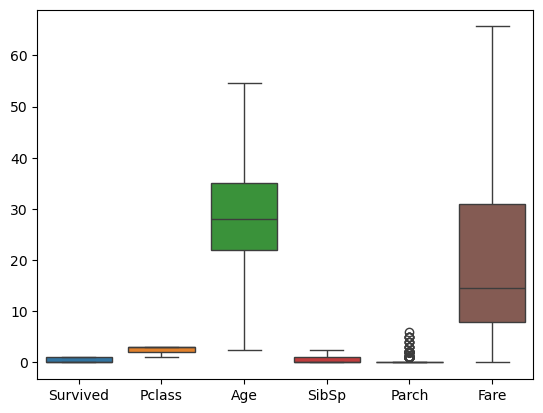

In [29]:
sn.boxplot(titanic)

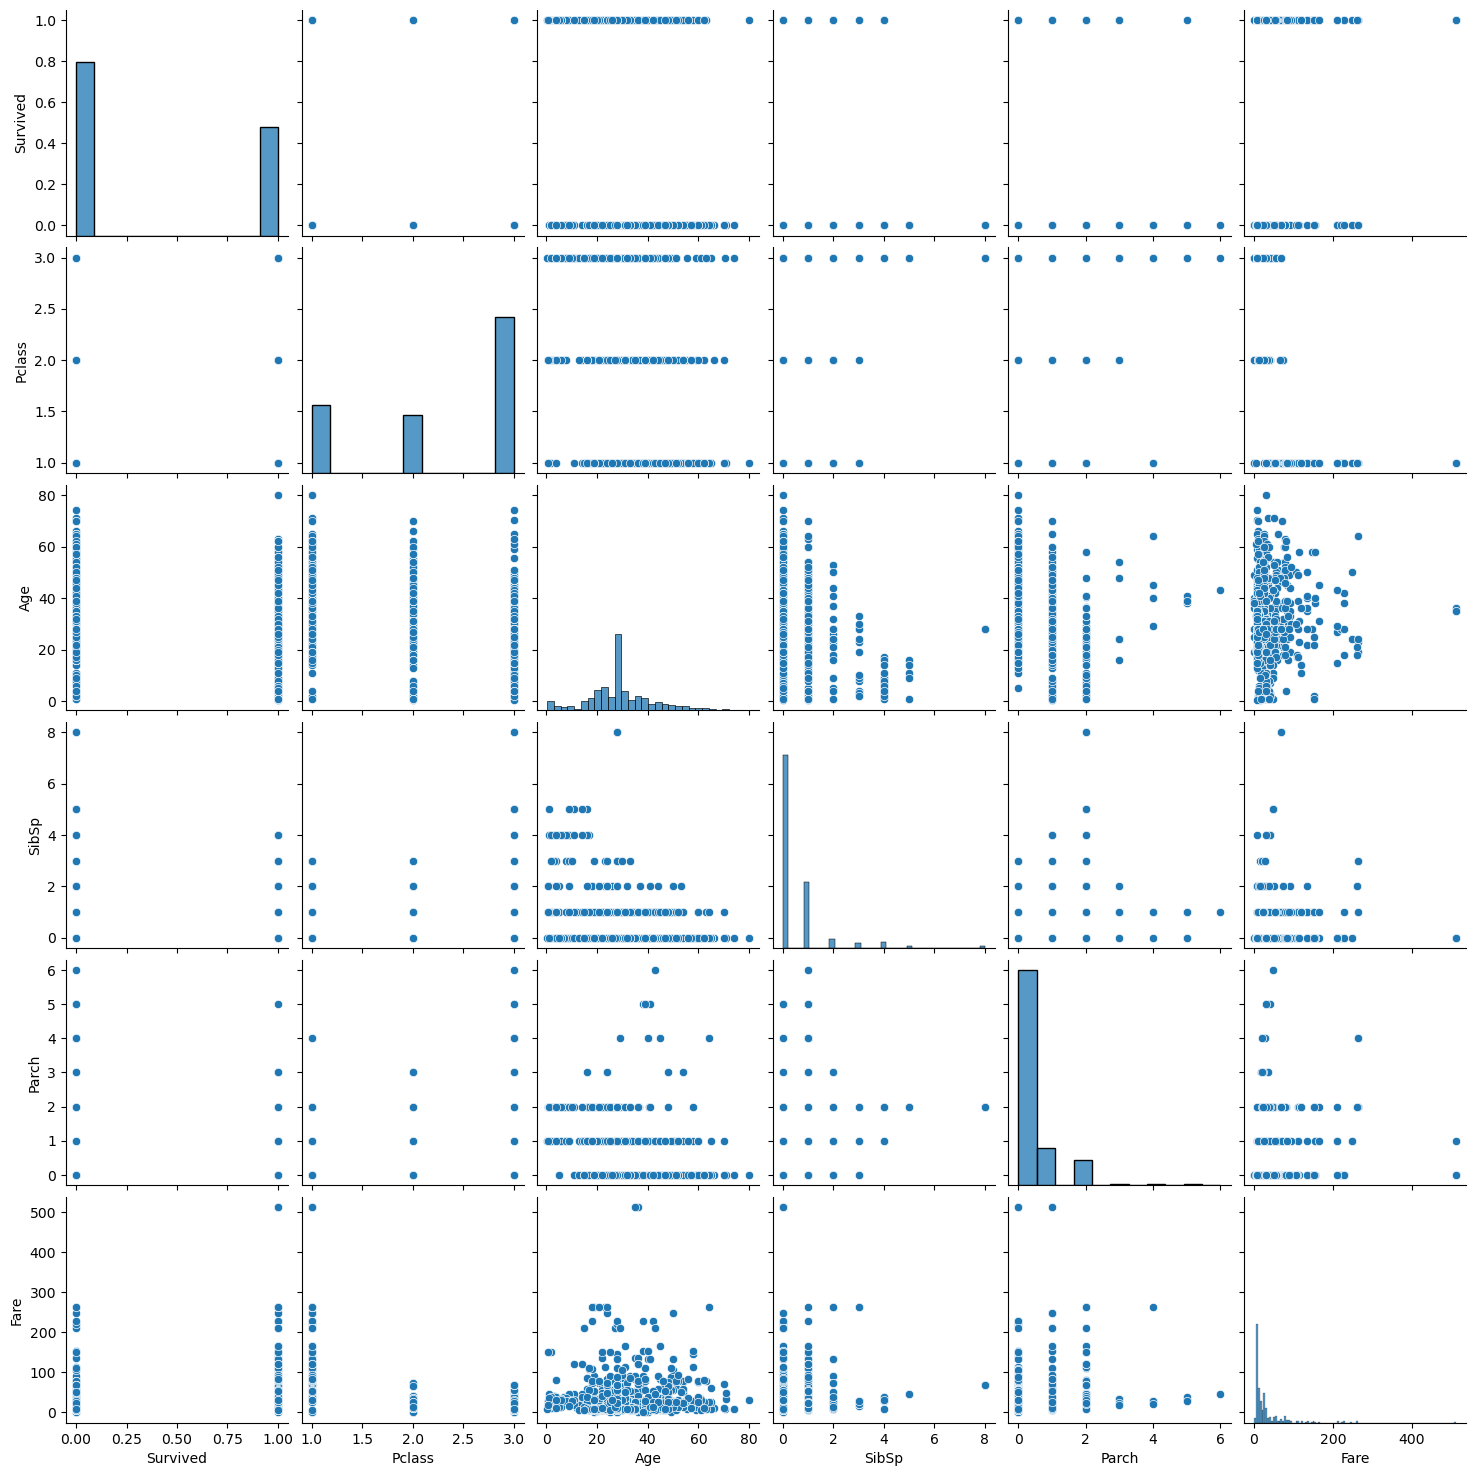

In [25]:
sn.pairplot(titanic)

## 2. Data preprocessing

In [33]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
titanic['Sex']= label_encoder.fit_transform(titanic['Sex']) 
titanic['Embarked']= label_encoder.fit_transform(titanic['Embarked']) 

In [35]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0,7.2500,2
1,1,1,0,38.0,1.0,0,65.6344,0
2,1,3,0,26.0,0.0,0,7.9250,2
3,1,1,0,35.0,1.0,0,53.1000,2
4,0,3,1,35.0,0.0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0.0,0,13.0000,2
887,1,1,0,19.0,0.0,0,30.0000,2
888,0,3,0,28.0,1.0,2,23.4500,2
889,1,1,1,26.0,0.0,0,30.0000,0


In [37]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.060622,0.031434,0.081629,0.317430,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.340404,0.023180,0.018443,-0.715300,0.162098
Sex,-0.543351,0.131900,1.000000,0.074740,-0.167885,-0.245489,-0.234969,0.108262
Age,-0.060622,-0.340404,0.074740,1.000000,-0.247806,-0.178959,0.144544,-0.018200
SibSp,0.031434,0.023180,-0.167885,-0.247806,1.000000,0.409366,0.349615,0.038362
Parch,0.081629,0.018443,-0.245489,-0.178959,0.409366,1.000000,0.292616,0.039798
Fare,0.317430,-0.715300,-0.234969,0.144544,0.349615,0.292616,1.000000,-0.199827
Embarked,-0.167675,0.162098,0.108262,-0.018200,0.038362,0.039798,-0.199827,1.000000


In [39]:
# Dividing our data into input and output variables
X = titanic.iloc[:,1:]
Y = titanic.iloc[:,0]

In [41]:
Y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## 3. Model building

Here, the dependent variable is imbalanced data so to balance that I use SMOTE which resample the data and give us a perfect balanced data.

In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Fit and transform the training data
X1, Y1 = smote.fit_resample(X, Y)

In [45]:
Y1.value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

In [47]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X1, Y1, test_size=0.3,random_state=10)

In [49]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(768, 7) (768,) (330, 7) (330,)


In [51]:
y_train.value_counts()

Survived
0    394
1    374
Name: count, dtype: int64

In [53]:
#Logistic regression and fit the model
classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [55]:
print(classifier.intercept_)
print(classifier.coef_)

[6.22813386]
[[-1.23932787e+00 -2.95880308e+00 -4.13300329e-02 -4.30584068e-01
  -2.02866894e-01  2.45968641e-03 -3.05206943e-01]]


## 4. Model evaluation

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_train,classifier.predict(x_train)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       394
           1       0.81      0.81      0.81       374

    accuracy                           0.82       768
   macro avg       0.82      0.81      0.81       768
weighted avg       0.82      0.82      0.82       768



In [59]:
print(classification_report(y_test,classifier.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       155
           1       0.85      0.79      0.82       175

    accuracy                           0.81       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.81      0.81      0.81       330



### ROC curve

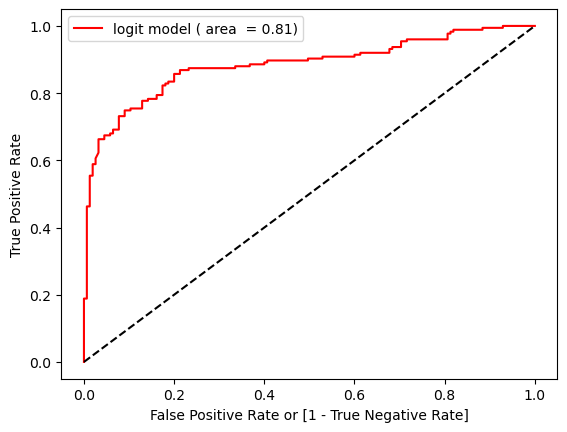

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba (x_test)[:,1])

auc =np.round( roc_auc_score(y_test, classifier.predict(x_test)),2)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label=f'logit model ( area  = {auc})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [63]:
titanic_test=pd.read_csv("C:\\Users\\hp\\Desktop\\EXCELR\\EXCELR\\Logistic Regression\\Titanic_test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
titanic_test.drop(["PassengerId","Name","Ticket","Cabin"],inplace=True,axis = 1)

In [67]:
label_encoder = preprocessing.LabelEncoder()
titanic_test['Sex']= label_encoder.fit_transform(titanic_test['Sex']) 
titanic_test['Embarked']= label_encoder.fit_transform(titanic_test['Embarked'])

In [69]:
titanic_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,NaN,0,0,8.0500,2


In [71]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


In [73]:
titanic_test["Age"]=titanic_test.Age.fillna(titanic.Age.median())
titanic_test["Fare"]=titanic_test.Fare.fillna(titanic.Fare.median())

In [75]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


In [77]:
preds = classifier.predict(titanic_test) # predicting on test data set 
pd.Series(preds).value_counts()

0    243
1    175
Name: count, dtype: int64

In [79]:
preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

## 5. Interpretation

Each coefficient represents the change in the log-odds of the outcome per unit increase in the corresponding feature. A large positive coefficient increases the log-odds of the positive class, making it more likely that the positive class is predicted.
A large negative coefficient decreases the log-odds, making the positive class less likely.

I have a logistic regression model with the following coefficients:

Intercept (β₀): 6.228
Pclass(β₁): −1.239 
Sex(β₂): −2.958
Age(β₃): −0.041
SibSp(β₄): −0.430
Parch(β₅): −0.202
Fare(β₆): 0.002
Embarked(β7): −0.305

This means:

* The intercept term 6.228 is the baseline log odds when all features are zero.

* For each unit increase in Pclass, the log odds of the survival probability decrease by 1.239.

* For each unit increase in Sex, the log odds of the survival probability decrease by 2.958.

* For each unit increase in Age, the log odds of the survival probability decrease by 0.041.

* For each unit increase in SibSp, the log odds of the survival probability decrease by 0.430.

* For each unit increase in Parch, the log odds of the survival probability decrease by 0.202.

* For each unit increase in Fare, the log odds of the survival probability increase by 0.002.

* For each unit increase in Embarked, the log odds of the survival probability decrease by 0.305.

## 6. Deployment

In [81]:
# save the model to disk
import pickle
filename = 'Titanic.pkl'
pickle.dump(classifier, open(filename, 'wb'))

## 7. Interview question

##### a. What is the difference between precision and recall?

Precision and recall are two fundamental metrics used in evaluating the performance of classification models. They provide different insights into the performance of a model, especially in scenarios where classes are imbalanced

Precision is a measure of the accuracy of the positive predictions made by the model. It tells us how many of the instances that the model classified as positive are actually positive.

Formula= True postive/(True positive+False positive)

Recall (or Sensitivity) measures how well the model can identify all the relevant instances within the dataset. It tells us how many of the actual positive instances the model was able to identify.

Formula= True positive/(True poitive+Flase negative)

##### b. What is cross-validation, and why is it important in binary classification?

In cross-validation, the data is divided into several subsets or "folds." The model is trained on some of these folds and tested on the remaining fold(s). This process is repeated multiple times with different train-test splits to ensure that every data point is used for both training and testing. The results are then averaged to provide a more comprehensive evaluation of the model’s performance.

Common Cross validation methods in classifications are;

1. Train-test split
2. K-Fold cross validation
3. Leave-one-out cross validation

It's used in binary classification problem to solve various problems like;

1. Reliable perfomance.
2. Identify the overfit and underfit.
3. Model comparision.